In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [72]:
class bandit:
    def __init__(self, arms, type, steps):
        self.arms = arms
        self.type = type
        self.steps = steps
        self.n = 0
        self.arm_n = np.zeros(arms)
        self.mean_r = 0
        self.reward = np.zeros(steps)
        self.arm_r = np.zeros(arms)
        # unknown mean reward of a action
        self.meansdist = np.random.normal(0, 1, arms)

    def run(self): 
        for i in range(self.steps):
            rn = np.random.rand()             
            if rn < self.type:
                act = np.random.choice(self.arms)
            else:
                act = np.argmax(self.arm_r)
            
            reward = np.random.normal(self.meansdist[act], 1)

            self.n += 1
            self.arm_n[act] += 1

            self.mean_r = self.mean_r + (reward - self.mean_r) / self.n
            self.arm_r[act] = self.arm_r[act] + (reward - self.arm_r[act]) / self.arm_n[act]
        
            self.reward[i] = self.mean_r
    

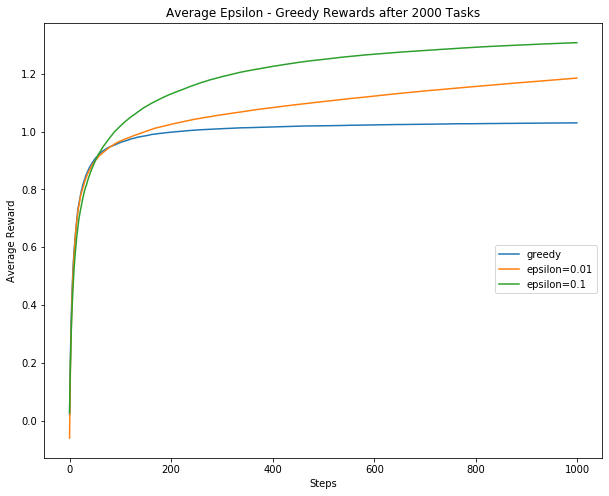

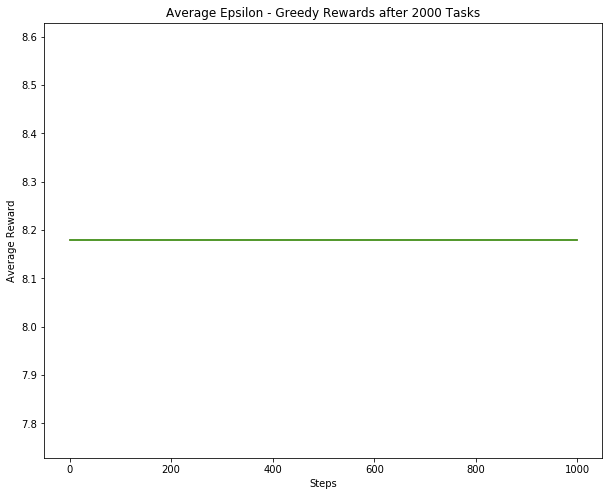

In [73]:
arms = 10
steps = 1000

greedy_r = np.zeros(steps)
ep01_r = np.zeros(steps)
ep1_r = np.zeros(steps)

greedy_opt_r = np.zeros(steps)
ep01_opt_r = np.zeros(steps)
ep1_opt_r = np.zeros(steps)

tasks = 2000

for i in range(tasks):
    greedy = bandit(arms, 0, steps)
    e01 = bandit(arms, 0.01, steps)
    e1 = bandit(arms, 0.1, steps)

    greedy.run()
    e01.run()
    e1.run()

    greedy_r = greedy_r + (greedy.reward - greedy_r) / (i + 1)
    ep01_r = ep01_r + (e01.reward - ep01_r) / (i + 1)
    ep1_r = ep1_r + (e1.reward - ep1_r) / (i + 1)

    greedy_opt_r = greedy_opt_r + 1 / (i + 1)
    ep01_opt_r = ep01_opt_r + 1 / (i + 1)
    ep1_opt_r = ep1_opt_r + 1 / (i + 1)

plt.figure(figsize=(10,8))
plt.plot(greedy_r, label="greedy")
plt.plot(ep01_r, label="epsilon=0.01")
plt.plot(ep1_r, label="epsilon=0.1")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Epsilon - Greedy Rewards after " + str(tasks) 
    + " Tasks")
plt.show()

plt.figure(figsize=(10,8))
plt.plot(greedy_opt_r, label="greedy")
plt.plot(ep01_opt_r, label="epsilon=0.01")
plt.plot(ep1_opt_r, label="epsilon=0.1")
#plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Epsilon - Greedy Rewards after " + str(tasks) 
    + " Tasks")
plt.show()


In [28]:
# define number of arms
k = 10

# define time steps 
steps = 1000

# define number of tasks
tasks = 2000

# define epsilon constants
ep0 = 0.0
ep01 = 0.1
ep001 = 0.01

# long term reward tracking
ep0_r = np.zeros(tasks)
ep1_r = np.zeros(tasks)
ep01_r = np.zeros(tasks)





In [23]:
def run(type, n, arm_n, mean_r, arm_r):
    for j in range(steps):
        # select the action to take randomly
        if type == ep01 or ep001:
            act = np.random.randint(1,11)
        else:
            # take greedy option
            act = np.argmax(arm_r)

        # determine the reward
        reward = np.random.normal(0, 1, 11)[act]

        # update our counters
        n += 1
        arm_n[act-1] += 1

        # update each arm reward
        arm_r[act-1] = (arm_r[act-1] + (reward - arm_r[act-1])) / arm_r[act-1]

        # update step reward
        mean_r = (mean_r + (reward - mean_r)) / n

    return mean_r

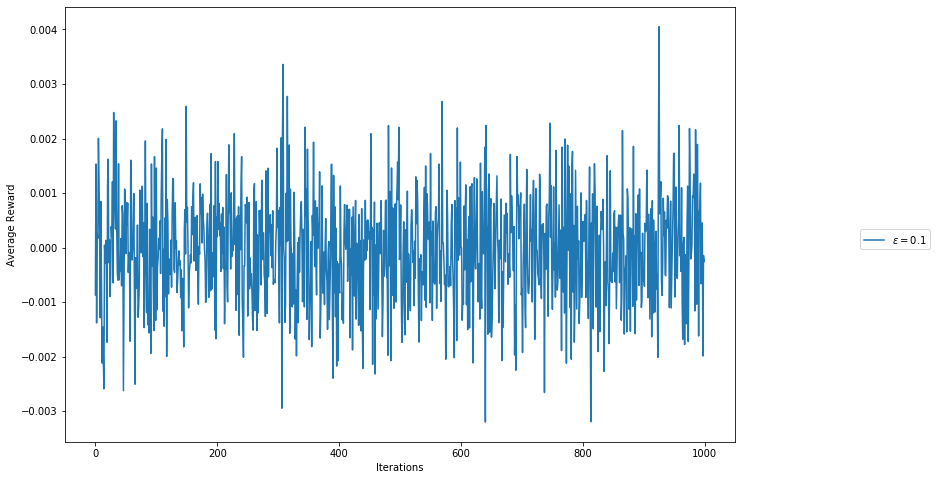

In [24]:
for i in range(tasks):
    # reset all of these at the start of each task
    # define step counters
    n = 0
    arm_n = np.zeros(k)

    # define containers for rewards of each type
    ep0_r = np.zeros(steps)
    ep001_r = np.zeros(steps)
    ep01_r = np.zeros(steps)

    # reward results for each task
    mean_r = 0

    # reward results for each arm
    arm_r = np.zeros(k)

    meanR_step = np.zeros(steps)

    # For each type run 1000 times

    mr = run(ep01, n, arm_n, mean_r, arm_r)
    meanR_step[j] = mr

         #print(ep01_r)
         #print(meanR_step)
    ep01_r = (ep01_r + (meanR_step - ep01_r))/(j+1)
         #print(ep01_r)
         #print(meanR_step)
         #break
    #break


plt.figure(figsize=(12,8))
plt.plot(ep01_r, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.show()
    

In [25]:
print(ep01_r)

[-8.68235123e-04  1.53167118e-03 -1.38221880e-03  2.62419907e-04
  1.68060762e-04  2.00451490e-03  1.18967501e-03  9.23965766e-05
 -1.28824919e-03  8.45747667e-04 -6.99814083e-04 -2.11952448e-03
 -1.45560806e-03 -2.07871929e-03 -2.59174686e-03  4.27312618e-05
 -2.87163070e-04  1.32172443e-04 -8.41628850e-05 -1.73838318e-03
  1.15386813e-03  1.62112599e-03 -2.77116333e-04  1.39978148e-04
 -8.99707412e-04 -5.19048714e-04  3.85594083e-04  2.06250179e-04
  1.20712529e-03 -6.49028225e-04  2.47717260e-03  1.26420086e-03
  7.31941740e-04  3.39017426e-04  2.32520753e-03  3.75412220e-04
 -4.68560138e-04 -5.98402875e-04  1.53565936e-03 -5.93221427e-04
 -3.17260450e-04 -4.27661264e-04  1.64053458e-04 -7.02950719e-04
  7.67556060e-04  6.11147566e-04 -2.62400168e-03 -6.85587103e-04
  1.07343120e-03  9.68004444e-04 -1.12295864e-04  8.25783600e-04
  4.07690683e-04  8.15691228e-04 -4.57450828e-04 -9.09890547e-05
 -2.68690414e-04 -1.71821671e-03  1.60321993e-03  1.06995375e-03
 -2.28660401e-04 -3.99215

In [76]:
steps = 1000
ep0q1_r = np.zeros(steps)
print(ep0q1_r.shape)

(1000,)


In [6]:
reward = np.random.normal(0,1,10)
print(reward)

[ 0.11980272 -0.244964    0.09521042  0.04686853  0.14449203 -0.38847216
  0.36595173  0.99217236 -1.163953   -0.01042523]
